## **Association Sprint Challenge**


The journey into Association, a form of Unsupervised Machine Learning exposed you to the concepts of:

a) Maket Basket Analysis 

b) Collaborative Filtering (including Matrix Factorization)

The purpose of this Sprint Challenge is to solidify your understanding of the Association Rule Learning topics covered this week by providing additional practice.

In this Sprint Challenge, we are going to use a few different data sets:

**Store Transactions data set**: https://www.dropbox.com/s/v3wdo3nzl41vxcd/Store_Transactions.csv?raw=1

**Movies data set**: https://www.dropbox.com/s/qo7v9k5rcwt7wgh/movies.csv?raw=1

**User Movie Ratings data set**: https://www.dropbox.com/s/piypmzeucyz160l/ratings_small.csv?raw=1

**Some Tips**:

1) You *may* need to prepare the data.

2) You will have to transpose the data set so that you get a proper representation of the underlying data set that can be feed into the Apriori Algorithm

Create solutions for the following code blocks. This exercise should take ~ 1.5 - 2 hours.

Share with mlsubmissions@lambdaschool.com when finished.


In [0]:
#LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

transactions = pd.read_csv('https://www.dropbox.com/s/v3wdo3nzl41vxcd/Store_Transactions.csv?raw=1')
movies = pd.read_csv('https://www.dropbox.com/s/qo7v9k5rcwt7wgh/movies.csv?raw=1')
ratings = pd.read_csv('https://www.dropbox.com/s/piypmzeucyz160l/ratings_small.csv?raw=1')

In [0]:
#Install the MLxtend package

!pip install MLxtend

In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.preprocessing import TransactionEncoder

### Identifying Frequent Itemsets and Association Rules

**Dataset:**

Store Transactions: https://www.dropbox.com/s/v3wdo3nzl41vxcd/Store_Transactions.csv?raw=1

**1:** Utilize the Apriori Algorithm to uncover frequent itemsets

In [0]:
transactions = pd.read_csv('https://www.dropbox.com/s/v3wdo3nzl41vxcd/Store_Transactions.csv?raw=1')
# print(transactions.isnull().sum())
# print(transactions.head())

transactions_per_row = transactions.pivot_table(
    index='Transaction_id', columns='Product_id', values='Quantity',
    aggfunc='sum', fill_value=0)
# print(transactions_per_row)
frequent_itemsets = apriori(transactions_per_row, min_support=0.005, use_colnames=True)
# print(frequent_itemsets)
associationrules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.08)
associationrules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4),(24),0.063032,0.102215,0.005111,0.081081,0.793243,-0.001332,0.977002
1,(4),(81),0.063032,0.109029,0.005111,0.081081,0.743666,-0.001762,0.969586
2,(6),(176),0.052811,0.071550,0.005111,0.096774,1.352535,0.001332,1.027927
3,(9),(153),0.044293,0.088586,0.005111,0.115385,1.302515,0.001187,1.030294
4,(15),(136),0.056218,0.093697,0.005111,0.090909,0.970248,-0.000157,0.996934
5,(30),(50),0.057922,0.071550,0.005111,0.088235,1.233193,0.000966,1.018300
6,(88),(30),0.057922,0.057922,0.005111,0.088235,1.523356,0.001756,1.033247
7,(30),(88),0.057922,0.057922,0.005111,0.088235,1.523356,0.001756,1.033247
8,(36),(85),0.063032,0.049404,0.005111,0.081081,1.641193,0.001997,1.034472
9,(85),(36),0.049404,0.063032,0.005111,0.103448,1.641193,0.001997,1.045079


**2:** Discover the strongest association rules that have high lift and high confidence

In [0]:
high = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
high

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(9),(153),0.044293,0.088586,0.005111,0.115385,1.302515,0.001187,1.030294
1,(85),(36),0.049404,0.063032,0.005111,0.103448,1.641193,0.001997,1.045079
2,(69),(84),0.047700,0.090290,0.005111,0.107143,1.186658,0.000804,1.018876
3,(140),(100),0.045997,0.068143,0.005111,0.111111,1.630556,0.001976,1.048339


**3:**  Create a Summary Table or Directed Graph to surface the association rules identified in **Ask 2** above

Nodes: ['R0', 9, 153, 'R1', 85, 36, 'R2', 69, 84, 'R3', 140, 100]
Edges: [('R0', 153), (9, 'R0'), ('R1', 36), (85, 'R1'), ('R2', 84), (69, 'R2'), ('R3', 100), (140, 'R3')]
Node positions: {'R0': array([-1.        , -0.12681144]), 9: array([-0.72819092, -0.57779851]), 153: array([ 0.95885645, -0.37702087]), 'R1': array([-0.59700034,  0.79014672]), 85: array([0.94790651, 0.13180832]), 36: array([ 0.62645517, -0.8060748 ]), 'R2': array([-0.9665195 ,  0.44916015]), 69: array([0.78713607, 0.61979181]), 84: array([0.3468386 , 0.85205117]), 'R3': array([-0.12761281,  0.99523991]), 140: array([ 0.13158958, -0.95482398]), 100: array([-0.3794588 , -0.99566848])}


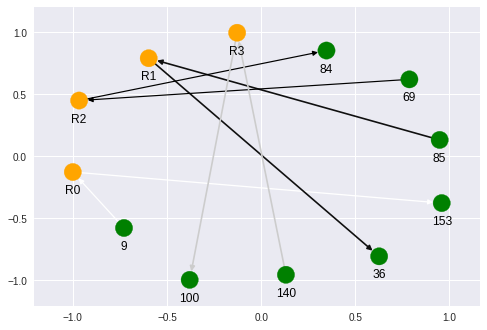

In [0]:
import networkx as netx
import matplotlib.pyplot as plt

def draw_association_graph(rules, rules_to_show):
  """Function to draw graph visualization association rules."""
  DiGraph = netx.DiGraph()
  
  colors = np.random.rand(rules_to_show)
  rule_nodes = set()
  
  for i in range(rules_to_show):
    rule_node = 'R' + str(i)
    DiGraph.add_nodes_from([rule_node])
    rule_nodes.add(rule_node)
    lift = rules.iloc[i]['lift']
    
    # For antecedant, the arrow originates from antecedant to the Rule node
    for antecedant in rules.iloc[i]['antecedants']:
      DiGraph.add_nodes_from([antecedant])
      DiGraph.add_edge(antecedant, rule_node, color=colors[i], weight=lift)
    
    # For consequent, the arrow originates fromt he Rule node to the consequent
    for consequent in rules.iloc[i]['consequents']:
      DiGraph.add_edge(rule_node, consequent, color=colors[i], weight=lift)
  
  # Set the color of rule nodes to orange, non-rule nodes to green
  node_colors = ['orange' if node in rule_nodes else 'green'
                 for node in DiGraph]
  
  # Print/draw results!
  edges = DiGraph.edges()
  nodes = DiGraph.nodes()
  print('Nodes: ' + str(nodes))
  print('Edges: ' + str(edges))
  
  edge_colors = [DiGraph[src][dest]['color'] for src, dest in edges]
  edge_weights =  [DiGraph[src][dest]['weight'] for src, dest in edges]
  
  positions = netx.spring_layout(DiGraph, k=15, scale=1)
  print("Node positions: " + str(positions))
  netx.draw_networkx(DiGraph, positions, edges=edges, node_color=node_colors,
                    edge_color=edge_colors, width=edge_weights, font_size=16,
                    with_labels=False)
  
  # Add labels under nodes
  for position in positions:
    positions[position][1] -= 0.15
  netx.draw_networkx_labels(DiGraph, positions)
  plt.show()
  
draw_association_graph(high, high.shape[0])

### Collaborative Filtering

Dataset:


*Movies*: https://www.dropbox.com/s/qo7v9k5rcwt7wgh/movies.csv?raw=1

*User Movie Ratings*: https://www.dropbox.com/s/piypmzeucyz160l/ratings_small.csv?raw=1

**1:** Utilize Matrix Factorization to arrive at the 2 matrices i.e. a) User Ratings (across attributes) b) Movie Ratings (across attributes). Once you have the 2 matrices, compute the "dot" product of the 2 matrices to come up with an estimate/prediction for the missing user ratings

For this ask, you could leverage the Matrix Factorization step that was discussed in the lecture **OR**

Here is another implmentation for your reference that could be leveraged (may need to be adapted): 

https://lazyprogrammer.me/tutorial-on-collaborative-filtering-and-matrix-factorization-in-python/


In [0]:
# movies = pd.read_csv('https://www.dropbox.com/s/4ec9l887mth6rep/movie_ratings.csv?raw=1')
print(movies.head())
ratings = pd.read_csv('https://www.dropbox.com/s/piypmzeucyz160l/ratings_small.csv?raw=1')
print(ratings.head())

# Transpose the dataset set so that the columns represent the individual movies
df_pivot = pd.pivot_table(ratings, index='userId', columns='movieId', aggfunc=np.max).fillna(0)
print(df_pivot)


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205
        rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId   

In [0]:
# Created by Albert Au Yeung (2010)
#
# An implementation of matrix factorization
#

!pip install numba
from numba import jit

@jit
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

# R     : a matrix to be factorized, dimension N x M
# P     : an initial matrix of dimension N x K
# Q     : an initial matrix of dimension M x K
# K     : the number of latent features
# steps : the maximum number of steps to perform the optimization
# alpha : the learning rate
# beta  : the regularization parameter  
R = df_pivot.as_matrix()
N = len(R)
M = len(R[0])
K = 2

P = np.random.rand(N,K) # Matrix of user attributes
Q = np.random.rand(M,K) # Matrix of movie attributes

nP, nQ = matrix_factorization(R, P, Q, K)

# User Movie Ratings = User Ratings (across attributes) **X** Movie Ratings (across the same set of attributes) 

nR = np.dot(nP, nQ.T)

print(nR) # Estimate/Prediction for the user movie ratings

**2:** Pick 2 Userid's from the underlying data set and surface recommendations for the Userid's you chose



In [0]:
# def recommend_for_user(user):
  user_ratings = list(df_pivot.iloc[user-1].values)
  print(user_ratings)
  all_ratings = nR[user-1]
  print(all_ratings)
  seen = [i for i, e in enumerate(user_ratings) if e != 0]
  print('seen: ', seen)
  sorted_ix = sorted(range(len(all_ratings)), key=lambda k: all_ratings[k])
  print('sorted_ix: ', sorted_ix)
  sorted_unseen = [x for x in sorted_ix if x not in seen]
  print('sorted_unseen: ', sorted_unseen)
  rec = list(sorted_unseen)[-5:]
  return rec

print(recommend_for_user(1))
print(recommend_for_user(8))

**3:** Pick 2 movies and find movies that are similar to the movies you have picked

In [0]:
from sklearn.metrics import pairwise_distances

df_movie_pivot = pd.pivot_table(ratings, index='movieId', columns='userId', values='rating').fillna(0)
corr_sim = 1 - pairwise_distances(df_movie_pivot.as_matrix(), metric='correlation')
df_corr_sim = pd.DataFrame(corr_sim)

def retrieve_similar_movies(movieId, n=5):
  # Retrieve the correlation similarity coefficients for the given movie
  df_movies['corr_similarity'] = df_corr_sim.iloc[movieId - 1]
  top_similar_items = df_movies.sort_values(['corr_similarity'],
                                            ascending=False)[1:n+1]
  
